<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/%D0%A1NN_for_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# From Kaggle to google colab


In [4]:
!pip install kaggle

In [5]:
!mkdir -p ~/.kaggle

In [6]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
! cp kaggle.json ~/.kaggle

In [11]:
! chmod 600 /root/.kaggle/kaggle.json

In [12]:
! kaggle datasets list

ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023              47KB  2023-08-26 11:04:57          10353        339  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target  185MB  2023-09-18 18:16:21            359         50  1.0              
muhammadtalhaawan/world-export-and-import-dataset          World Export & Import Dataset (1989 - 2023)  721KB  2023-09-09 18:59:41           1145         32  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)         210KB  2023-09-0

In [13]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 79% 52.0M/66.0M [00:00<00:00, 149MB/s]
100% 66.0M/66.0M [00:00<00:00, 132MB/s]


In [14]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [16]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [18]:
dataset_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset = dataset_1.drop(['Time', 'Class'])
y = dataset_1.Class

# Dataset Preprocessing

In [19]:
dataset_1.shape

(284807, 31)

In [20]:
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
dataset_1.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
fraud = dataset_1[dataset_1.Class ==1]
no_fraud = dataset_1[dataset_1.Class ==0]

In [24]:
fraud.shape, no_fraud.shape

((492, 31), (284315, 31))

In [25]:
# Random selection of samples
no_fraud_t = no_fraud.sample(n = 492)

In [26]:
no_fraud_t.shape

(492, 31)

In [30]:
# Merge the datasets
dataset = fraud.append(no_fraud_t, ignore_index=True)

<ipython-input-30-b3f1f6f53e9f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(no_fraud_t, ignore_index=True)


In [33]:
dataset.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [36]:
#matrix of features
x = dataset.drop(labels = ['Class'], axis =1)
y = dataset.Class

In [37]:
x.shape, y.shape

((984, 30), (984,))

In [38]:
#splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 0)

In [40]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [42]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
 y_train = y_train.to_numpy()
 y_test = y_test.to_numpy()

In [44]:
#reshape the dataset
x_train = x_train.reshape(787,30,1)
x_test = x_test.reshape(197, 30,1)

In [45]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Building the model


In [46]:
model = tf.keras.models.Sequential()

In [48]:
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, padding = 'same',
                                 activation = 'relu', input_shape = (30, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size =2))
model.add(tf.keras.layers.Dropout(0.2))


In [49]:
model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, padding = 'same',
                                 activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

In [50]:
model.add(tf.keras.layers.Flatten())

In [51]:
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [52]:
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))



In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)            2

In [54]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics = 'accuracy')

# Training the model


In [55]:
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
25/25 [==============================] - 13s 25ms/step - loss: 0.4298 - accuracy: 0.8183 - val_loss: 0.5377 - val_accuracy: 0.8883
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2751 - accuracy: 0.9009 - val_loss: 0.4930 - val_accuracy: 0.8883
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2282 - accuracy: 0.9263 - val_loss: 0.4510 - val_accuracy: 0.9036
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2088 - accuracy: 0.9225 - val_loss: 0.4095 - val_accuracy: 0.9239
Epoch 5/25
25/25 [==============================] - 0s 7ms/step - loss: 0.1887 - accuracy: 0.9288 - val_loss: 0.3574 - val_accuracy: 0.9289
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.1583 - accuracy: 0.9454 - val_loss: 0.3052 - val_accuracy: 0.9391
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.1684 - accuracy: 0.9352 - val_loss: 0.2725 - val_accuracy: 0.9340
Epoch 8/25
25/25 [

In [58]:
y_pred = model.predict(x_test).round()

7/7 [==============================] - 0s 3ms/step


In [ ]:
print(y_pred)

In [60]:
y_pred[13], y_test[13]

(array([1.], dtype=float32), 1)

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   3]
 [  6  85]]


In [62]:
acc_cm = accuracy_score(y_test, y_pred)

In [63]:
print(acc_cm)

0.9543147208121827


In [69]:
  def learning_curve(history, epochs):

    epoch_range = range(1,epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Score')
    plt.legend(['accuracy', 'val_acc'], loc = 'lower right')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'], loc = 'upper right')
    plt.show()

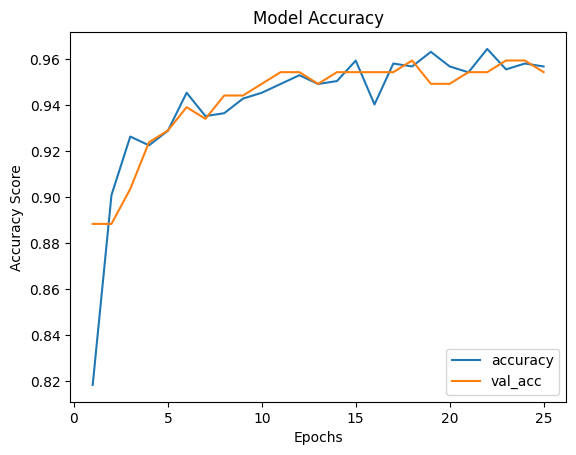

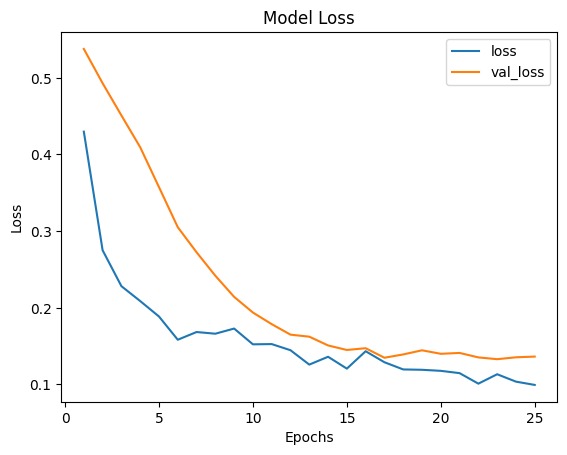

In [70]:
learning_curve(history,25)